In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [3]:
df = pd.read_csv('../data/eats_runtimes.csv', index_col=0) / 1000
df_relative = df.div(df.loc['CPU'], axis=1) * 100

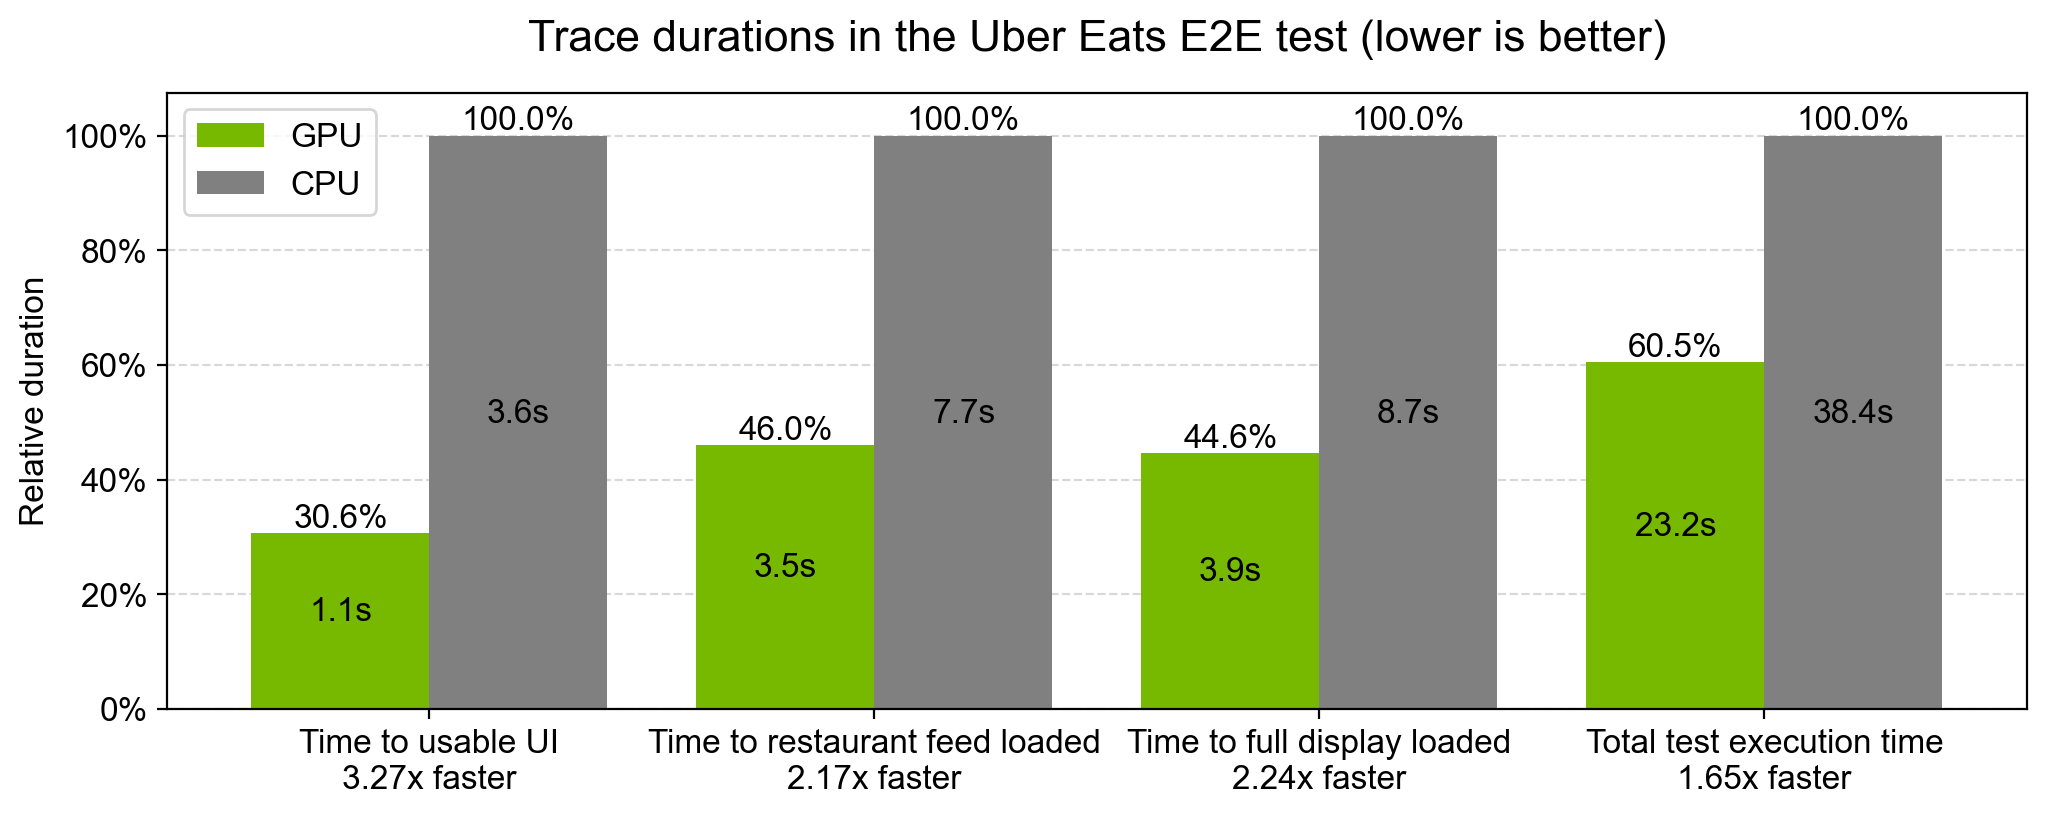

In [11]:
ax: plt.Axes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4), dpi=200)

plt.title("Trace durations in the Uber Eats E2E test (lower is better)", pad=15, size=16)
ax.set_axisbelow(True)

# x axis
cases = np.arange(len(df.columns))
ax.set_xticks(cases, df.columns)

# y axis
yticks = range(0, 101, 20)
ax.set_yticks(yticks, labels=[str(i) + '%' for i in yticks])
ax.set_ylabel("Relative duration")
ax.grid(axis='y', which='major', visible=True, linestyle='--', color='grey', alpha=0.3)

# bars
ax.bar(cases - 0.2, df_relative.loc['GPU'], 0.4, label='GPU', color='#76B900')
ax.bar(cases + 0.2, df_relative.loc['CPU'], 0.4, label='CPU', color='grey')
ax.legend()

for i, case in enumerate(df.columns):
    kw = { 'color': 'black', 'horizontalalignment': 'center' }
    df_case = df.loc[:, case]
    df_case_rel = df_relative.loc[:, case]

    # percentages
    ax.text(i - 0.2, df_case_rel['GPU'] + 1, str(round(df_case_rel['GPU'], 1)) + '%', **kw)
    ax.text(i + 0.2, df_case_rel['CPU'] + 1, str(round(df_case_rel['CPU'], 1)) + '%', **kw)

    # absolute values
    ax.text(i - 0.2, df_case_rel['GPU'] / 2, str(round(df_case['GPU'], 1)) + 's', **kw)
    ax.text(i + 0.2, df_case_rel['CPU'] / 2, str(round(df_case['CPU'], 1)) + 's', **kw)

    # speedup
    speedup = df_case_rel['CPU'] / df_case_rel['GPU']
    ax.text(i, -14, f'{round(speedup, 2)}x faster', **kw)

ax.margins(0.05, 0.075)
plt.show()
